In [ ]:
import os
import shutil

os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
shutil.copy('kaggle.json', os.path.expanduser('~/.kaggle/kaggle.json'))
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)


In [ ]:
# Kaggle api 
!kaggle competitions download -c dogs-vs-cats

In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = 'train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

In [1]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


# Printing the name of images

In [3]:
file_names = os.listdir('train3')
print(file_names)

['cat.0.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10036.jpg', 'cat.10040.jpg', 'cat.10044.jpg', 'cat.10054.jpg', 'cat.10060.jpg', 'cat.10065.jpg', 'cat.10076.jpg', 'cat.10079.jpg', 'cat.1008.jpg', 'cat.10096.jpg', 'cat.10100.jpg', 'cat.10102.jpg', 'cat.1011.jpg', 'cat.10119.jpg', 'cat.1012.jpg', 'cat.10121.jpg', 'cat.10122.jpg', 'cat.10123.jpg', 'cat.10127.jpg', 'cat.10134.jpg', 'cat.10136.jpg', 'cat.1014.jpg', 'cat.10146.jpg', 'cat.10147.jpg', 'cat.10151.jpg', 'cat.10158.jpg', 'cat.1016.jpg', 'cat.10162.jpg', 'cat.10167.jpg', 'cat.10174.jpg', 'cat.10179.jpg', 'cat.10199.jpg', 'cat.102.jpg', 'cat.1020.jpg', 'cat.10200.jpg', 'cat.10213.jpg', 'cat.10219.jpg', 'cat.10222.jpg', 'cat.10227.jpg', 'cat.10231.jpg', 'cat.10232.jpg', 'cat.10234.jpg', 'cat.10236.jpg', 'cat.10239.jpg', 'cat.10242.jpg', 'cat.10247.jpg', 'cat.10255.jpg', 'cat.10273.jpg', 'cat.10276.jpg', 'cat.10284.jpg', 'cat.10289.jpg', 'cat.10290.jpg', 'cat.10294.jpg', 'cat.10299.jpg', 'cat.103

In [6]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('train3'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  4000


In [8]:
file_names = os.listdir('train3/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 1975
Number of cat images = 2025


In [ ]:
import os
import random
import shutil

def select_random_images(source_folder, destination_folder, num_images):
    """
    Selects a specified number of random images from a source folder
    and copies them to a destination folder in a random order.

    Args:
        source_folder (str): Path to the folder containing the original images.
        destination_folder (str): Path to the folder where the random selection will be copied.
        num_images (int): The number of random images to select.
    """
    try:
        all_images = [f for f in os.listdir(source_folder) if os.path.isfile(os.path.join(source_folder, f))]
        if not all_images:
            print(f"Error: No files found in the source folder: {source_folder}")
            return

        if len(all_images) < num_images:
            print(f"Warning: The source folder contains only {len(all_images)} images, which is less than the requested {num_images}.")
            num_to_select = len(all_images)
        else:
            num_to_select = num_images

        randomly_selected_images = random.sample(all_images, num_to_select)

        # Create the destination folder if it doesn't exist
        os.makedirs(destination_folder, exist_ok=True)

        for image_name in randomly_selected_images:
            source_path = os.path.join(source_folder, image_name)
            destination_path = os.path.join(destination_folder, image_name)
            shutil.copy2(source_path, destination_path)  # copy2 preserves metadata
            print(f"Copied: {image_name}")

        print(f"\nSuccessfully copied {num_to_select} random images to: {destination_folder}")

    except FileNotFoundError:
        print(f"Error: Source folder not found: {source_folder}")
    except Exception as e:
        print(f"An error occurred: {e}")

# --- Configuration ---
source_image_folder = "train"  # Replace with the actual path to your 'train' folder
destination_random_folder = "train3" # Replace with the desired destination folder
number_of_images_to_select = 4000

# --- Run the script ---
select_random_images(source_image_folder, destination_random_folder, number_of_images_to_select)

# Importing Libraries

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2
import os


# Displaying the images of dogs and cats

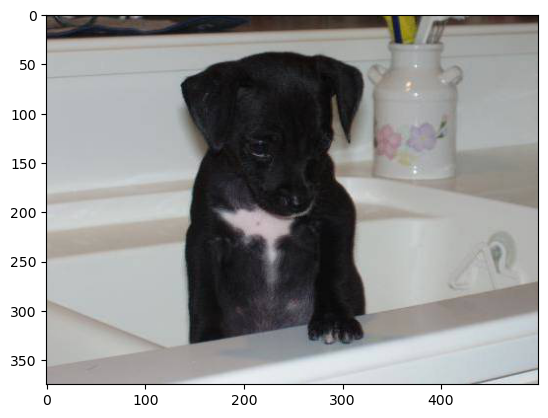

In [94]:
# display dog image
img = mpimg.imread('train/dog.8298.jpg')
imgplt = plt.imshow(img)
plt.show()

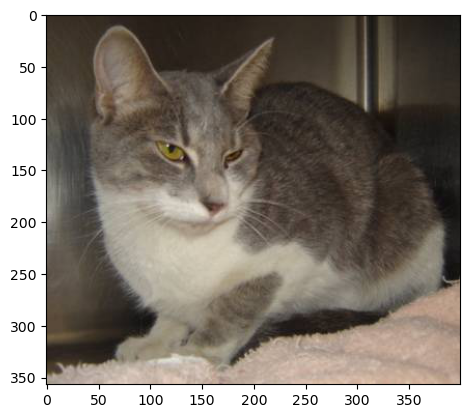

In [96]:
# display cat image
img = mpimg.imread('train/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [100]:
file_names = os.listdir('train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


# Resizing all the image

In [ ]:
#creating a directory for resized images
os.mkdir('image resized')

In [ ]:
original_folder = 'train3/'
resized_folder = 'image resized/'

for i in range(4000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [102]:
file_names = os.listdir('image resized/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 1975
Number of cat images = 2025


In [12]:
file_names = os.listdir('image resized')
print(file_names)

['cat.0.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10036.jpg', 'cat.10040.jpg', 'cat.10044.jpg', 'cat.10054.jpg', 'cat.10060.jpg', 'cat.10065.jpg', 'cat.10076.jpg', 'cat.10079.jpg', 'cat.1008.jpg', 'cat.10096.jpg', 'cat.10100.jpg', 'cat.10102.jpg', 'cat.1011.jpg', 'cat.10119.jpg', 'cat.1012.jpg', 'cat.10121.jpg', 'cat.10122.jpg', 'cat.10123.jpg', 'cat.10127.jpg', 'cat.10134.jpg', 'cat.10136.jpg', 'cat.1014.jpg', 'cat.10146.jpg', 'cat.10147.jpg', 'cat.10151.jpg', 'cat.10158.jpg', 'cat.1016.jpg', 'cat.10162.jpg', 'cat.10167.jpg', 'cat.10174.jpg', 'cat.10179.jpg', 'cat.10199.jpg', 'cat.102.jpg', 'cat.1020.jpg', 'cat.10200.jpg', 'cat.10213.jpg', 'cat.10219.jpg', 'cat.10222.jpg', 'cat.10227.jpg', 'cat.10231.jpg', 'cat.10232.jpg', 'cat.10234.jpg', 'cat.10236.jpg', 'cat.10239.jpg', 'cat.10242.jpg', 'cat.10247.jpg', 'cat.10255.jpg', 'cat.10273.jpg', 'cat.10276.jpg', 'cat.10284.jpg', 'cat.10289.jpg', 'cat.10290.jpg', 'cat.10294.jpg', 'cat.10299.jpg', 'cat.103

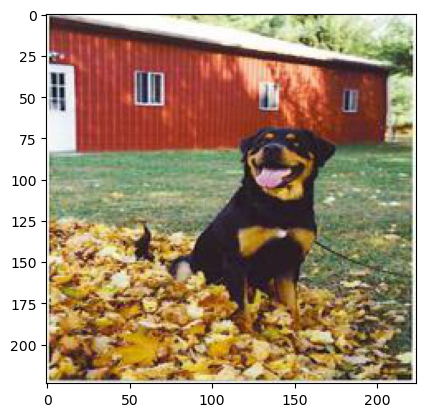

In [106]:
# display resized dog image
img = mpimg.imread('image resized/dog.1232.jpg')
imgplt = plt.imshow(img)
plt.show()

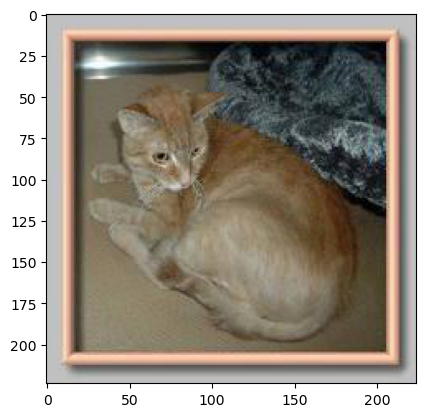

In [108]:
# display resized cat image
img = mpimg.imread('image resized/cat.6057.jpg')
imgplt = plt.imshow(img)
plt.show()

In [29]:
### Creating labels for resized images of dogs and cats

### Cat --> 0

### Dog --> 1

In [26]:
# creaing a for loop to assign labels
filenames = os.listdir('image resized/')


labels = []

for i in range(4000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [28]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.10031.jpg', 'cat.10032.jpg']
4000


In [30]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
4000


In [32]:
# counting the images of dogs and cats out of 25000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[2025 1975]


# Converting all the resized images to numpy arrays

In [14]:
import cv2
import glob

In [16]:
image_directory = 'image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [18]:
print(dog_cat_images)

[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [123 200 246]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [123 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [125 203 246]
   [124 201 247]
   [124 201 247]]

  ...

  [[ 57 123 158]
   [ 57 123 158]
   [ 56 124 159]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 55 121 156]
   [ 56 122 157]
   [ 55 123 158]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]

  [[ 54 120 155]
   [ 54 120 155]
   [ 53 121 156]
   ...
   [  0   2   1]
   [  0   2   1]
   [  0   2   1]]]


 [[[120 136 178]
   [115 138 176]
   [107 142 176]
   ...
   [ 73  65  72]
   [ 72  64  71]
   [ 71  63  70]]

  [[121 137 179]
   [116 139 177]
   [108 143 177]
   ...
   [ 74  66  73]
   [ 73  65  72]
   [ 73  65  72]]

  [[122 138 180]
   [117 140 178]
   [109 144 178]
   ...
   [ 75  67  74]
   [ 75  67  74]
   [ 74  66

In [20]:
type(dog_cat_images)

numpy.ndarray

In [22]:
print(dog_cat_images.shape)

(4000, 224, 224, 3)


In [34]:
X = dog_cat_images
Y = np.asarray(labels)

# Train Test Split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(4000, 224, 224, 3) (3200, 224, 224, 3) (800, 224, 224, 3)


### 3200 trained images
### 800 test images

In [86]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

# Building the Neural Network

In [43]:
!pip install tensorflow-hub


In [51]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [45]:
pip install tf_keras

Note: you may need to restart the kernel to use updated packages.


In [75]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [79]:
import tf_keras
num_of_classes = 2

model = tf_keras.Sequential([
    
    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [83]:
import tf_keras
model.compile(
    optimizer = 'adam',
    loss = tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [85]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5



100/100 [==============================] - 63s 531ms/step - loss: 0.1155 - acc: 0.9566
Epoch 2/5
100/100 [==============================] - 49s 495ms/step - loss: 0.0438 - acc: 0.9862
Epoch 3/5
100/100 [==============================] - 58s 583ms/step - loss: 0.0331 - acc: 0.9916
Epoch 4/5
100/100 [==============================] - 48s 482ms/step - loss: 0.0271 - acc: 0.9931
Epoch 5/5
100/100 [==============================] - 50s 504ms/step - loss: 0.0231 - acc: 0.9941


In [89]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

25/25 [==============================] - 12s 447ms/step - loss: 0.0596 - acc: 0.9825
Test Loss = 0.0596037432551384
Test Accuracy = 0.9825000166893005


# Predictive System

Path of the image to be predicted:  train/dog.8298.jpg


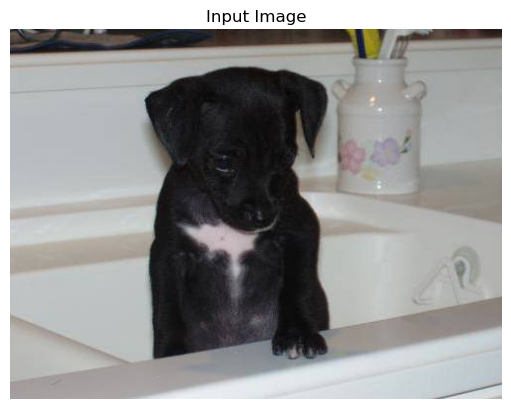

1/1 [==============================] - 1s 1s/step
Raw prediction: [[-3.2514021  0.4678957]]
Predicted class index: 1
The image represents a Dog


In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Prompt user to input the image path
input_image_path = input('Path of the image to be predicted: ')

# Read the image using OpenCV
input_image = cv2.imread(input_image_path)

# Convert BGR to RGB (since OpenCV reads images in BGR format)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')
plt.show()

# Preprocess the image
input_image_resize = cv2.resize(input_image_rgb, (224, 224))
input_image_scaled = input_image_resize / 255.0
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Predict using your model
input_prediction = model.predict(image_reshaped)
print("Raw prediction:", input_prediction)

# Get predicted label
input_pred_label = np.argmax(input_prediction)
print("Predicted class index:", input_pred_label)

# Interpret the result
if input_pred_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')


Path of the image to be predicted:  train/cat.4352.jpg


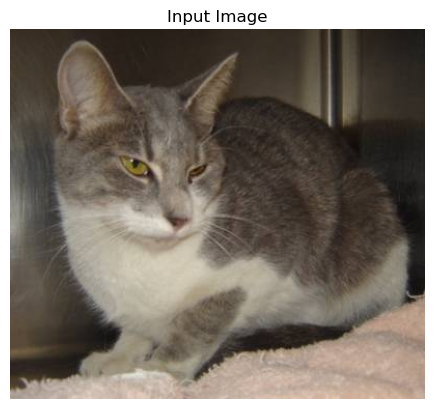

1/1 [==============================] - 1s 862ms/step
Raw prediction: [[ 3.8210828 -5.034381 ]]
Predicted class index: 0
The image represents a Cat


In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Prompt user to input the image path
input_image_path = input('Path of the image to be predicted: ')

# Read the image using OpenCV
input_image = cv2.imread(input_image_path)

# Convert BGR to RGB (since OpenCV reads images in BGR format)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(input_image_rgb)
plt.title("Input Image")
plt.axis('off')
plt.show()

# Preprocess the image
input_image_resize = cv2.resize(input_image_rgb, (224, 224))
input_image_scaled = input_image_resize / 255.0
image_reshaped = np.reshape(input_image_scaled, [1, 224, 224, 3])

# Predict using your model
input_prediction = model.predict(image_reshaped)
print("Raw prediction:", input_prediction)

# Get predicted label
input_pred_label = np.argmax(input_prediction)
print("Predicted class index:", input_pred_label)

# Interpret the result
if input_pred_label == 0:
    print('The image represents a Cat')
else:
    print('The image represents a Dog')


In [100]:
model.save("cat_dog_model.h5")


C:\Users\Dell\anaconda3\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
